In [184]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [185]:
# Load the dataset
diabetes_data = load_diabetes()

In [186]:
A = diabetes_data.data
b = diabetes_data.target
b = b.reshape(-1,1)

delta = 1e-6
epsilon = 0.01
max_iterations = 1000

SEED = 123456
np.random.seed(SEED)
start_point = np.random.rand(A.shape[1],1)

In [187]:
print(f"max label = {max(x[0] for x in b)}")
print(f"min label = {min(x[0] for x in b)}")
print(f"avg of labels = {np.average(b)}")
print(f"median of labels = {np.median(b)}")

max label = 346.0
min label = 25.0
avg of labels = 152.13348416289594
median of labels = 140.5


In [188]:
# Auxiliary definitions

grad_at = lambda x: A.T@A@x-A.T@b

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['lines.linewidth'] = 3


def uniform_plt_show(title='Error convergence'):
  plt.xlabel('Iteration')
  plt.ylabel('Error')

  plt.title(title,
    fontsize=18,
    # loc='left',
    fontweight='bold',
    # style='italic',
    # family='monospace'
  )
  
  plt.grid(linestyle='--')
  plt.legend(loc='upper right', prop={'size': 10})

  # Show the plot
  plt.show()

iterations: 1000
last error: 26020.214793679097


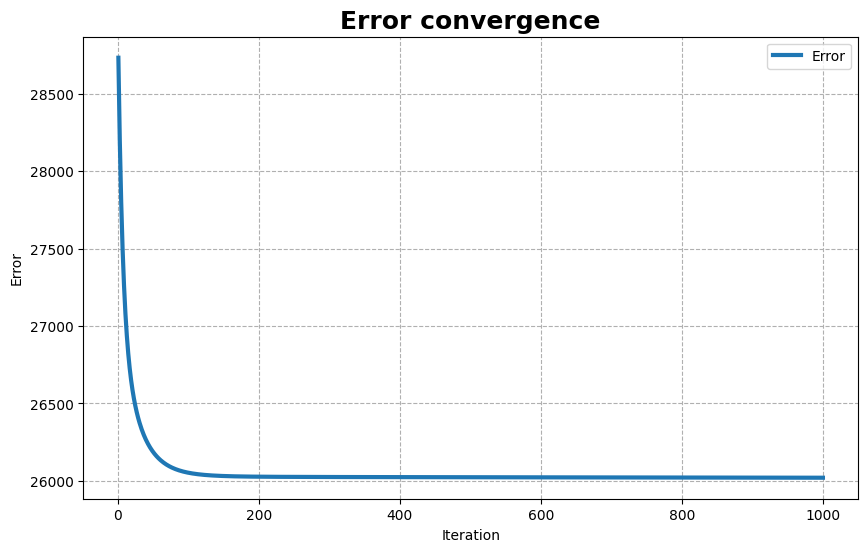

In [189]:
# Question 1 plot and info

errors = []

x = start_point.copy()

grad_x = grad_at(x)
iterations = 1

while 2*np.linalg.norm(grad_x) > delta and iterations <= max_iterations:
  iterations += 1
  x = x - 2 * epsilon * grad_x
  grad_x = grad_at(x)
  errors.append(np.linalg.norm(A@x - b) ** 2 / len(b))

print(f"iterations: {len(errors)}")
print(f"last error: {errors[-1]}")

# Plot the points
plt.plot(range(1, len(errors)+1), errors, label="Error")
uniform_plt_show()


iterations: 1000
last train error: 25922.176407732277
last test error: 26409.06367277156


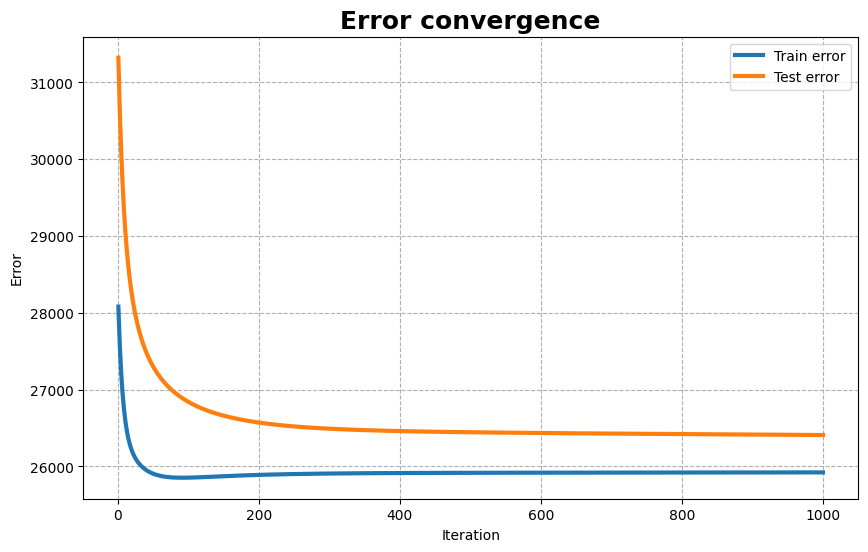

In [190]:
# Question 2 plot and info

# Split the dataset into training and test sets
A_train, A_test, b_train, b_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=SEED)
b_train = b_train.reshape(-1, 1)
b_test = b_test.reshape(-1, 1)

errors_train = []
errors_test = []

x = start_point.copy()
grad_x = grad_at(x)
iterations = 1

while 2*np.linalg.norm(grad_x) > delta and iterations <= max_iterations:
  iterations += 1
  x = x - 2 * epsilon * grad_x
  grad_x = grad_at(x)
  errors_train.append(np.linalg.norm(A_train@x - b_train) ** 2 / len(b_train))
  errors_test.append(np.linalg.norm(A_test@x - b_test) ** 2 / len(b_test))

print(f"iterations: {len(errors_train)}")
print(f"last train error: {errors_train[-1]}")
print(f"last test error: {errors_test[-1]}")

# Plot the points
plt.plot(range(1, len(errors)+1), errors_train, label=f"Train error")
plt.plot(range(1, len(errors)+1), errors_test, label=f"Test error")
uniform_plt_show()


In [191]:
# Question 3 algorithm code

seeds = [2 ** i for i in range(10)]

train_errors = dict()
test_errors = dict()

errors_train_avg = np.zeros(max_iterations)
errors_test_avg = np.zeros(max_iterations)

errors_train_min = np.ones(max_iterations) * np.Inf
errors_test_min = np.ones(max_iterations) * np.Inf


for SEED in seeds:
  # Split the dataset into training and test sets
  A_train, A_test, b_train, b_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=SEED)
  b_train = b_train.reshape(-1, 1)
  b_test = b_test.reshape(-1, 1)

  errors_train = []
  errors_test = []

  x = start_point.copy()
  grad_x = grad_at(x)
  iterations = 0

  # gradient descent algorithm
  while 2*np.linalg.norm(grad_x) > delta and iterations < max_iterations:
    x = x - 2 * epsilon * grad_x
    grad_x = grad_at(x)

    train_error = np.linalg.norm(A_train@x - b_train) ** 2 / len(b_train)
    test_error = np.linalg.norm(A_test@x - b_test) ** 2 / len(b_test)

    errors_train.append(train_error)
    errors_test.append(test_error)

    errors_train_avg[iterations] += train_error/len(seeds)
    errors_test_avg[iterations] += test_error/len(seeds)

    errors_train_min[iterations] = min(train_error, errors_train_min[iterations])
    errors_test_min[iterations] = min(test_error, errors_test_min[iterations])

    iterations += 1
    
  train_errors[SEED] = np.array(errors_train)
  test_errors[SEED] = np.array(errors_test)

last train error avg=25942.040515377685
last train error min=25495.950136536852


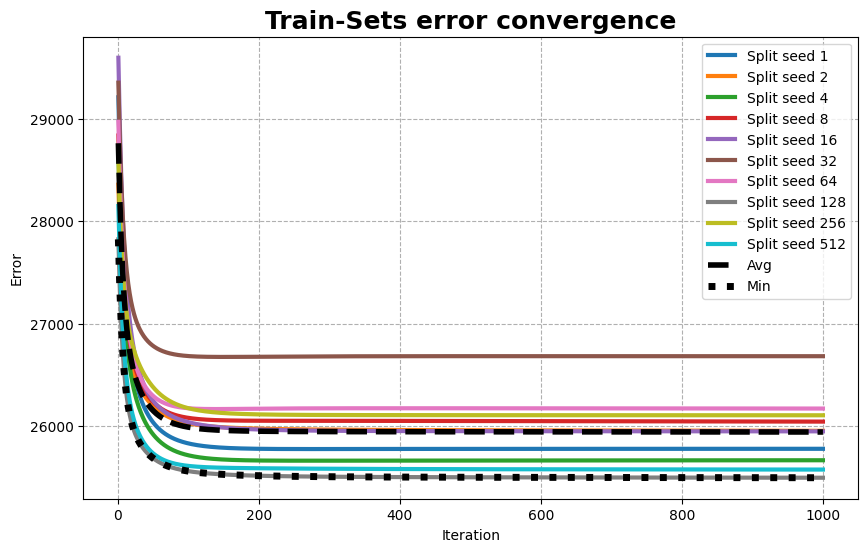

In [192]:
# Question 3 train sets plot and info

print(f"last train error avg={errors_train_avg[-1]}")
print(f"last train error min={errors_train_min[-1]}")

# Plot the train errors
for SEED in seeds:
  plt.plot(range(1, len(errors)+1), train_errors[SEED], label=f"Split seed {SEED}")

plt.plot(range(1, len(errors)+1), errors_train_avg, label=f"Avg", linestyle='--', color='black', lw=4)
plt.plot(range(1, len(errors)+1), errors_train_min, label=f"Min", linestyle=':', color='black', lw=5)

uniform_plt_show('Train-Sets error convergence')

last test error avg=26330.276818852148
last test error min=23395.647831043338


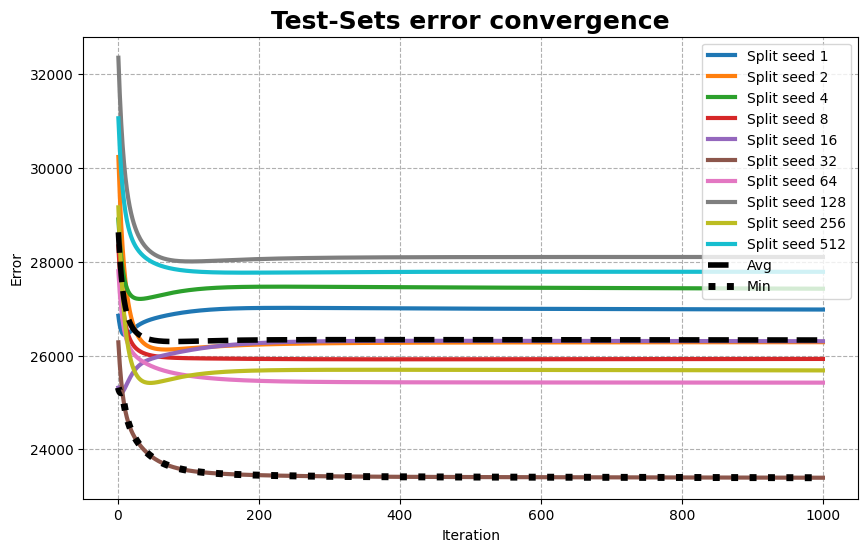

In [193]:
# Question 3 test sets plot and info

print(f"last test error avg={errors_test_avg[-1]}")
print(f"last test error min={errors_test_min[-1]}")

# Plot the test errors
for SEED in seeds:
  plt.plot(range(1, len(errors)+1), test_errors[SEED], label=f"Split seed {SEED}")

plt.plot(range(1, len(errors)+1), errors_test_avg, label=f"Avg", linestyle='--', color='black', lw=4)
plt.plot(range(1, len(errors)+1), errors_test_min, label=f"Min", linestyle=':', color='black', lw=5)

uniform_plt_show('Test-Sets error convergence')